# Vehicle MSRP Prediction
## Data Story Telling by Darren Lyles

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import warnings

<p>
    Questions to keep in mind for data story telling.
    <ol>
        <li>Can I count something interesting?</li>
        <li>Can I find trends (e.g. high, low, increasing, decreasing, anomalities)?</li>
        <li>Can I make a bar plot or a histogram?</li>
        <li>Can I compare two related quantities?</li>
        <li>Can I make a time-series plot?</li>
    </ol>
</p>

In [22]:
car_df = pd.read_csv('Car_Features_and_MSRP/data2017.csv')
car_df.head()

,Unnamed: 0,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,0,FIAT,124 Spider,2017,premium unleaded (recommended),160.0,4.0,MANUAL,rear wheel drive,2.0,Performance,Compact,Convertible,35,26,819,27495
1,1,FIAT,124 Spider,2017,premium unleaded (recommended),160.0,4.0,MANUAL,rear wheel drive,2.0,Performance,Compact,Convertible,35,26,819,24995
2,2,FIAT,124 Spider,2017,premium unleaded (recommended),160.0,4.0,MANUAL,rear wheel drive,2.0,Performance,Compact,Convertible,35,26,819,28195
3,3,BMW,2 Series,2017,premium unleaded (recommended),335.0,6.0,AUTOMATIC,all wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,31,21,3916,46450
4,4,BMW,2 Series,2017,premium unleaded (recommended),335.0,6.0,AUTOMATIC,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Convertible,32,21,3916,49050


In [23]:
print('Number of Auto Brands: ', len(sorted(list(car_df.Make.unique()))))

Number of Auto Brands:  30


In [24]:
print('Number of Cars with manual transmission: ', 
      len(car_df[car_df['Transmission Type'] == 'MANUAL']))
print('Number of cars with automatic transmission: ', 
      len(car_df[car_df['Transmission Type'] == 'AUTOMATIC']))
print('Number of cars with automated manual transmission: ', 
      len(car_df[car_df['Transmission Type'] == 'AUTOMATED_MANUAL']))
print('Number of cars with direct drive transmission: ', 
      len(car_df[car_df['Transmission Type'] == 'DIRECT_DRIVE']))

Number of Cars with manual transmission:  205
Number of cars with automatic transmission:  1356
Number of cars with automated manual transmission:  98
Number of cars with direct drive transmission:  9


In [25]:
print('Number of 2-Door Cars: ', len(car_df[car_df['Number of Doors'] == 2.0]))
print('Number of 3-Door Cars: ', len(car_df[car_df['Number of Doors'] == 3.0]))
print('Number of 4-Door Cars: ', len(car_df[car_df['Number of Doors'] == 4.0]))

Number of 2-Door Cars:  276
Number of 3-Door Cars:  16
Number of 4-Door Cars:  1376


<p>
    It is useful and interesting to compute various aggregations as shown above.  Here they are as summarized below:
    <ul>
        <li>Number of auto brands: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;       30</li>
        <li>Cars with manual transmission: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;                      205</li>
        <li>Cars with automatic transmission: &emsp;&emsp;&emsp;&emsp;&nbsp;                              1356</li>
        <li>Cars with automated manual transmission: &emsp;                                                 98</li>
        <li>Cars with direct drive transmission: &emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;                  9</li>
        <li>Number of 2-door cars: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp; 276</li>
        <li>Number of 3-door cars: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;  16</li>
        <li>Number of 4-door cars: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;            1376</li>
    </ul>
    These values are interesting since we can better understand the scope and limitations that the data set given has to offer. Our first observation shows that we are limited to 30 car brands out of <a href="https://en.wikipedia.org/wiki/Passenger_vehicles_in_the_United_States">50 possible car brands which are sold in the US</a>. Differentiating between cars with manual and automatic transmission is also interesting because <a href="https://www.consumerreports.org/cro/2012/01/save-gas-and-money-with-a-manual-transmission/index.htm">it is known</a> that manual transmission is cheaper to implement than automatic. With that in mind, transmission type should have an effect in the pricing of a car.  There are also direct drive and automated manual transmission, however the number of vehicles which have these transmission is relatively small. The amount of cars with two, three, and four doors are also something to consider since two door cars can usually be a high performance or sports car.  There were 16 three door cars, which was also ingtriguing and with a little bit of investigation into the data set, these three door cars were found to all be Ford Transit Wagons.  The third door for this vehicle is the sliding door on the side which lets multiple passengers enter the vehicle.
</p>

In [26]:
car_df[car_df['Number of Doors'] == 3.0].head()

,Unnamed: 0,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1482,1482,Ford,Transit Wagon,2017,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,3.0,Flex Fuel,Midsize,Passenger Van,19,14,5657,34515
1483,1483,Ford,Transit Wagon,2017,regular unleaded,275.0,6.0,AUTOMATIC,rear wheel drive,3.0,Diesel,Midsize,Passenger Van,19,14,5657,38015
1484,1484,Ford,Transit Wagon,2017,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,3.0,Flex Fuel,Midsize,Passenger Van,19,14,5657,34365
1485,1485,Ford,Transit Wagon,2017,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,3.0,Flex Fuel,Midsize,Passenger Van,19,14,5657,35810
1486,1486,Ford,Transit Wagon,2017,regular unleaded,275.0,6.0,AUTOMATIC,rear wheel drive,3.0,Diesel,Midsize,Passenger Van,19,14,5657,39310


In [27]:
car_df['Engine Fuel Type'].unique() #separate between unleaded, flex-fuel, electric, and diesel

array(['premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'premium unleaded (required)', 'diesel', 'regular unleaded',
       'electric', 'flex-fuel (premium unleaded recommended/E85)',
       'flex-fuel (unleaded/natural gas)'], dtype=object)

In [28]:
#Dropping Market Category Columns
car_df = car_df.drop(columns=['Market Category'])
car_df = car_df.drop(175) #Audi A6 Sedan with erroneous highway MPG of 354
car_df.to_csv('Car_Features_and_MSRP/data2017_cleaned.csv', index=False)
car_df.head()

,Unnamed: 0,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,0,FIAT,124 Spider,2017,premium unleaded (recommended),160.0,4.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,35,26,819,27495
1,1,FIAT,124 Spider,2017,premium unleaded (recommended),160.0,4.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,35,26,819,24995
2,2,FIAT,124 Spider,2017,premium unleaded (recommended),160.0,4.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,35,26,819,28195
3,3,BMW,2 Series,2017,premium unleaded (recommended),335.0,6.0,AUTOMATIC,all wheel drive,2.0,Compact,Coupe,31,21,3916,46450
4,4,BMW,2 Series,2017,premium unleaded (recommended),335.0,6.0,AUTOMATIC,rear wheel drive,2.0,Compact,Convertible,32,21,3916,49050


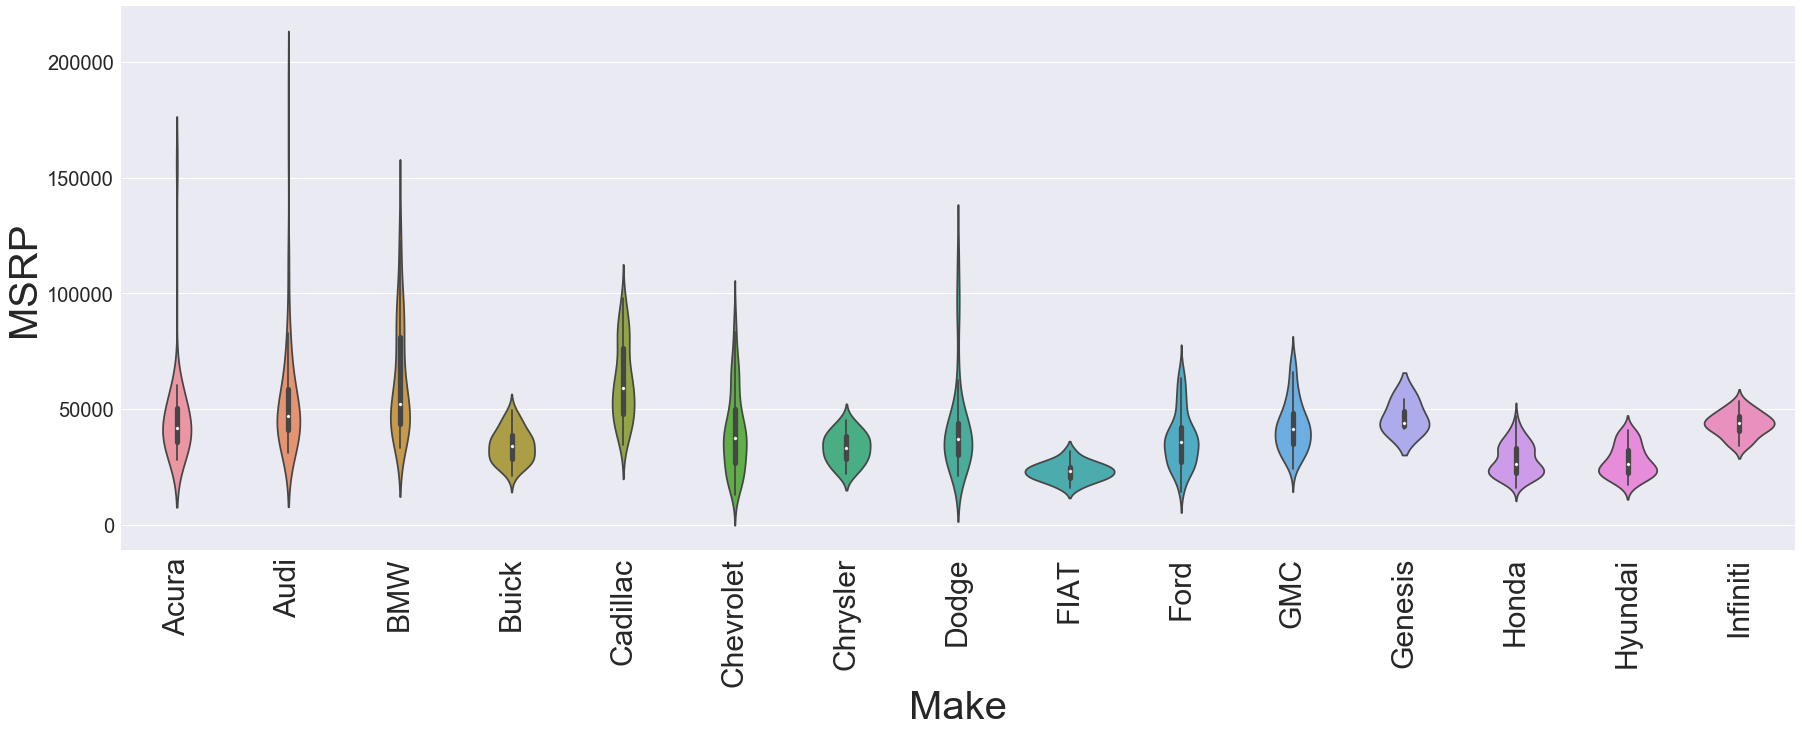

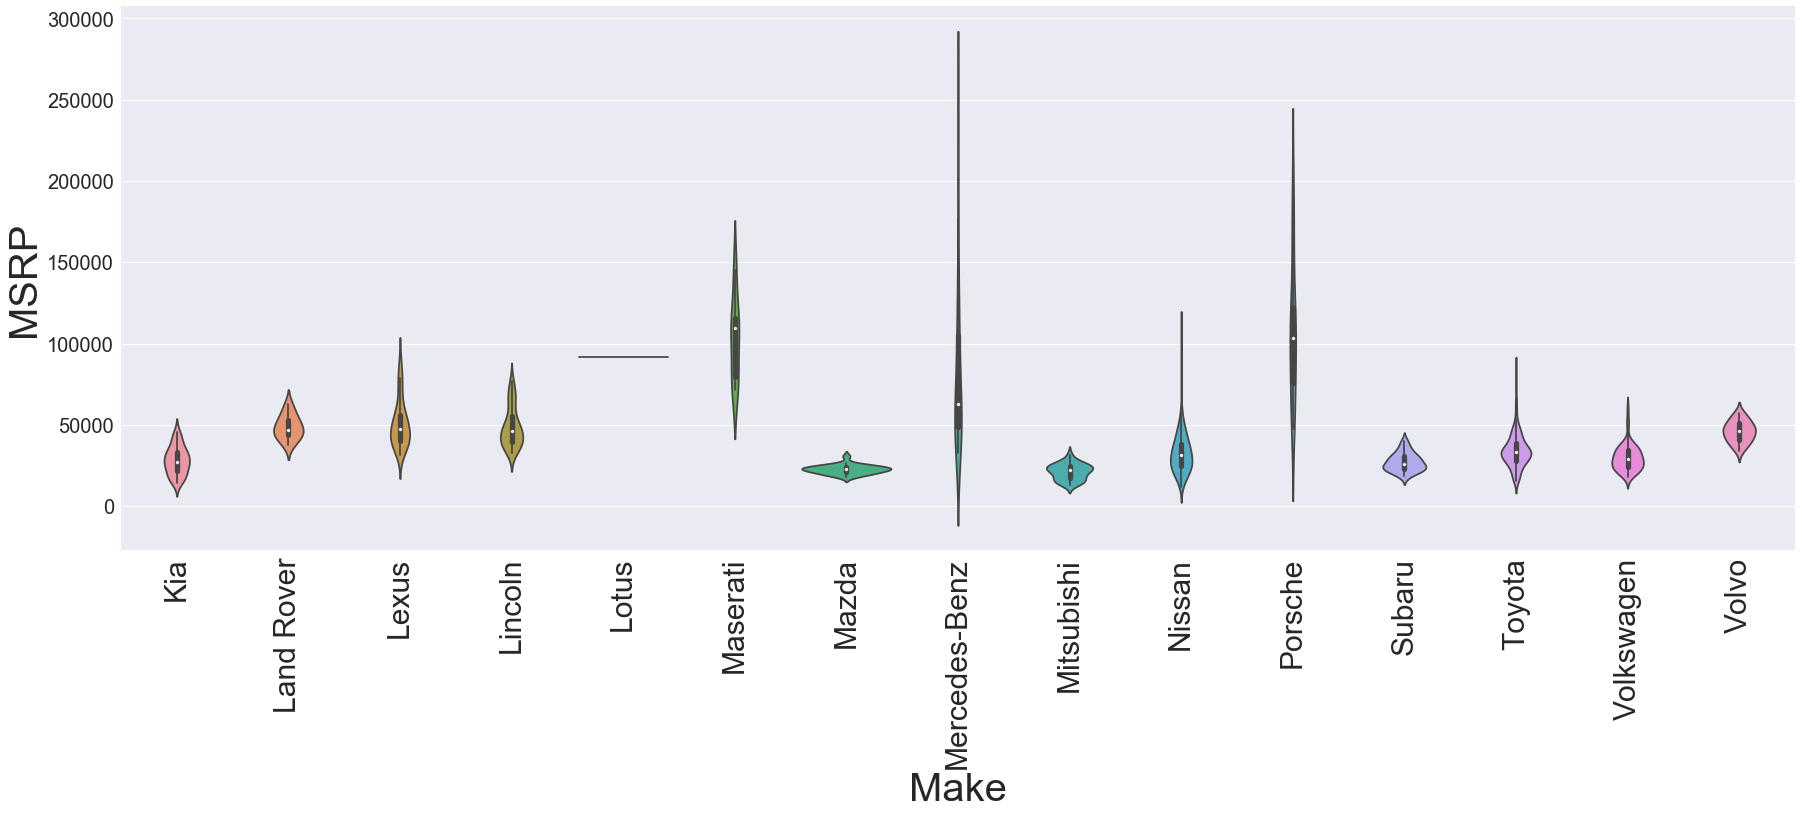

In [29]:
sns.set()
plt.rcParams["figure.figsize"] = (30, 10)
plt.xlabel('Make', fontsize=40)
plt.ylabel('Average MSRP', fontsize=40)
plt.xticks(fontsize=30,rotation=90)
plt.yticks(fontsize=20,rotation=0)
sns.violinplot('Make', 'MSRP', order=sorted(list(car_df.Make.unique()))[:15], data=car_df)
sns.despine(trim=True)
plt.figure()
plt.xlabel('Make', fontsize=40)
plt.ylabel('Average MSRP', fontsize=40)
plt.xticks(fontsize=30,rotation=90)
plt.yticks(fontsize=20,rotation=0)
sns.violinplot('Make', 'MSRP', order=sorted(list(car_df.Make.unique()))[15:], data=car_df)
sns.despine(trim=True)
plt.show()

<p>
    In the plots above, we enumerate each car brand in the data set and provide violin plots to better understand the distribution of pricing for each brand.  One of the observations we find in these plots is that luxury cars, namely Acura, Audi, BMW, Maserati, Mercedes Benz, and Porsche, have larger spreads of pricing compared to the other brands listed.  This makes sense from a consumer standpoint since these brands have a variety of models that range from being affordable for someone in the middle class and up to costing six figures. 
</p>
<p>
    Another observation is that brands usually associated with being more affordable have a much sall spread in pricing.  Some examples include Fiat, Honda, Hyundai, Kia, Mazda, Mitsubishi, and Subaru. Not only is the spread in pricing small, but the median pricings for these makes is well within the $\$20000$ to $\$30000$ range.  From a consumer standpoint, one can argue that if they're looking for a more affordable car, filtering your options by brand name would be a good start!
</p>    

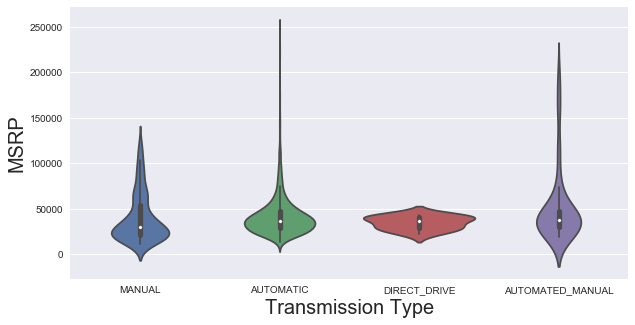

In [30]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.xlabel('Transmission Type', fontsize=20)
plt.ylabel('Average Price', fontsize=20)
sns.violinplot('Transmission Type', 'MSRP', data=car_df)
sns.despine(trim=True)
plt.show()

<p>One approach shown here is to group and plot the MSRP with respect to transmission.  This numerical vs. categorical relationship shows that automatic transmission have the most spread in pricing.  This could also be due to automatic transmission vehicles comprising roughly 81% of the dataset, while manual transmission is only 12% of the data. With this in mind, although it may be on cheaper on average to purchase a car given that is a manual transmission, the options in the US market are limited.  Another thing to note as well is that direct drive transmission and automated manual transmission comprise of roughly 1% and 6% respectively, hence the data is quite limited in terms of price options for these transmissions.  In conclusion, the data suggests to narrow down your search to a manual transmission if you want to save on the pricing.
</p>

<p>
    In order to explore the MRSP vs. MPG, I have separated the vehicles into 4 different fuel categories: Unleaded, Flex-Fuel, diesel, and electric
</p>

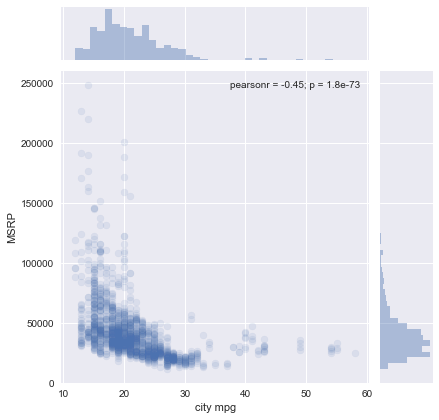

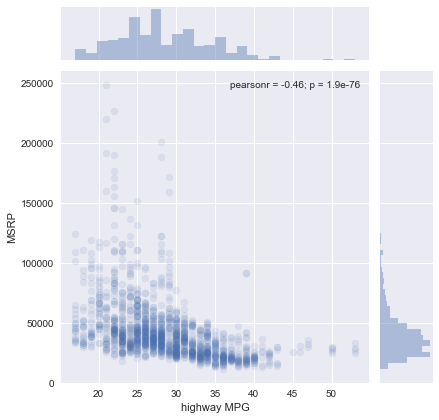

In [31]:
warnings.filterwarnings('ignore')
car_unleaded_df = car_df[car_df['Engine Fuel Type'].str.contains('^premium|^regular')]
sns.jointplot(x='city mpg', y='MSRP', data=car_unleaded_df, alpha=0.1)
sns.jointplot(x='highway MPG', y='MSRP', data=car_unleaded_df, alpha=0.1)
plt.show()

<p>
    When buying a car, most consumers usually want to get the most bang for their buck.  This also means spending less on fuel even after the purchase is made!  One may ask if having a vehicle with a strong MPG rating is possible with given his/her budget.  The plots above will give some insignt into this and see if that is the case.
</p>
<p>When looking at MSRP vs. City MPG, there is definitely a negative non-linear correlation between the two variables.  Vehicles which cost $\$75$k or more tend to have a city MPG of less than 20 MPG, while those that cost less than $\$40$k easily exceed 30 MPG and go as far as even past 50!  We also see a similar trend in highway MPG as well.
</p>    

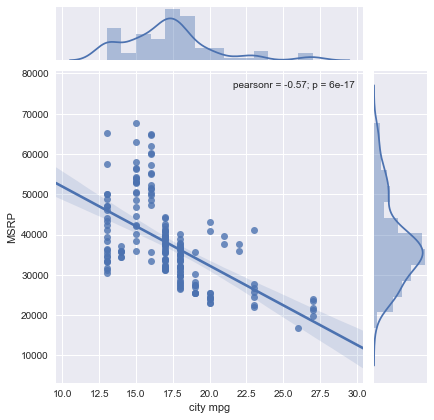

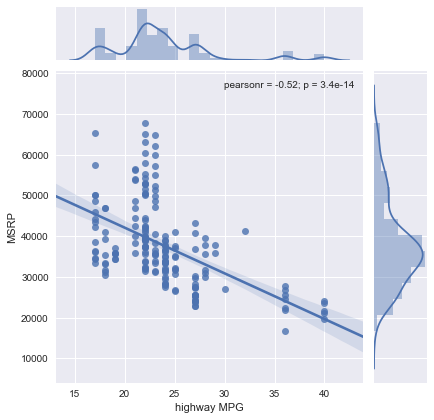

In [32]:
car_flexfuel_df = car_df[car_df['Engine Fuel Type'].str.contains('^flex')]
sns.jointplot(x='city mpg', y='MSRP', data=car_flexfuel_df, kind='reg')
sns.jointplot(x='highway MPG', y='MSRP', data=car_flexfuel_df, kind='reg')
plt.show()

<p>
    Here are the cars which have been classified as using flex-fuel.  We can see a negative correlation between MSRP and MPG, which further illustrates that cars with higher MPG tend to have lower MSRP.  We also observe this with diesel powered vehicles as seen below.
</p>

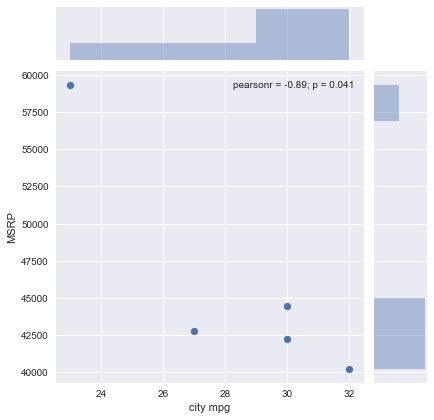

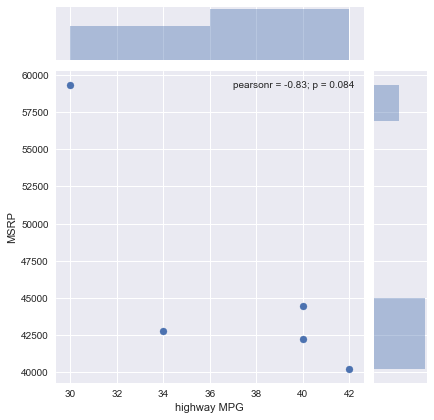

In [33]:
car_diesel_df = car_df[car_df['Engine Fuel Type'] == 'diesel']
sns.jointplot(x='city mpg', y='MSRP', data=car_diesel_df)
sns.jointplot(x='highway MPG', y='MSRP', data=car_diesel_df)
plt.show()

<p>
    Eletric vehicles, however, tend to have a positive correlation with MSRP!  So the more you want to save with MPG equivalent for electric vehicles, the more money you have to spend!
</p>

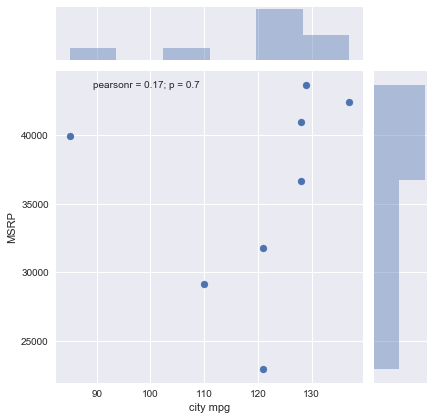

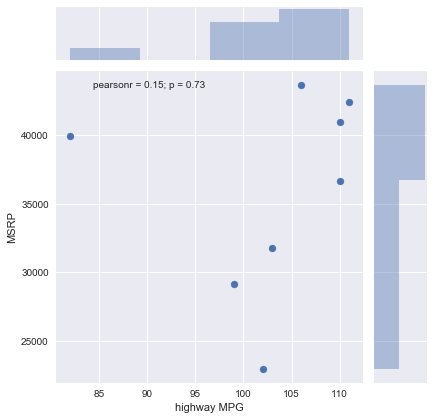

In [34]:
car_electric_df = car_df[car_df['Engine Fuel Type'] == 'electric']
sns.jointplot(x='city mpg', y='MSRP', data=car_electric_df)
sns.jointplot(x='highway MPG', y='MSRP', data=car_electric_df)
plt.show()

<p>*One thing that is important to note is that the provided data set had very limited number of diesel and electric cars. So based off of the data set given alone, the correlation coefficients given should be taken with a grain of salt. Had there been more data points for diesel and electric vehicles, it would be more plausible to accept these values.</p>

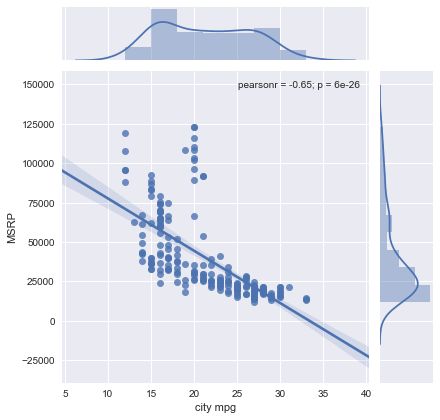

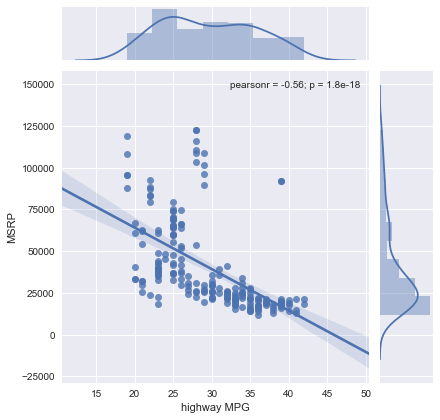

In [35]:
car_manual_df = car_df[car_df['Transmission Type'] == 'MANUAL']
sns.jointplot(x='city mpg', y='MSRP', data=car_manual_df, kind='reg')
sns.jointplot(x='highway MPG', y='MSRP', data=car_manual_df, kind='reg')
plt.show()

<p>These regression plots above show the city and hiway MPG, respectively, for vehicles which operate on a manual transmission.  For both the city and highway MPG, the data shows a negative correlation between MSRP and MPG.  In other words, manual transimission cars on the lower end of the price range tend to be more fuel efficient as opposed to the ones with higher MSRP.
</p>

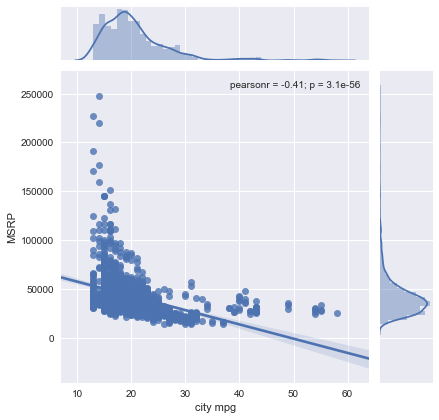

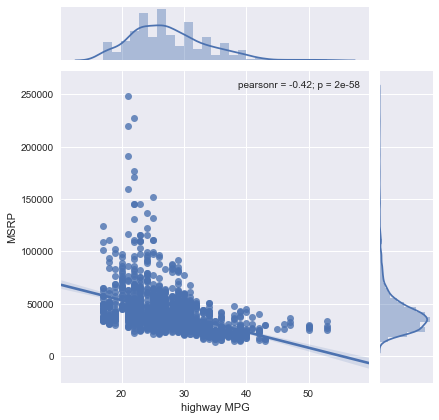

In [36]:
car_auto_df = car_df[car_df['Transmission Type'] == 'AUTOMATIC']
sns.jointplot(x='city mpg', y='MSRP', data=car_auto_df, kind='reg')
sns.jointplot(x='highway MPG', y='MSRP', data=car_auto_df, kind='reg')
plt.show()

<p>The vehicles with automatic transmission  has a shallower slope compared to the vehicles with manual transmission.  The reason this could possibly be so is because automatic transmission costs more to implement than manual transmission.  However, the trends in the automatic transmission category are rougly similar to the trends in the manual transmission.  If a consumer wants a higher chance in getting the lowest MSRP possible, these four plots suggest to go for a vehicle with high city and highway MPG.  After purchasing a high MPG vehicle, you also have the benefit of saving on fuel costs in the future!
</p>

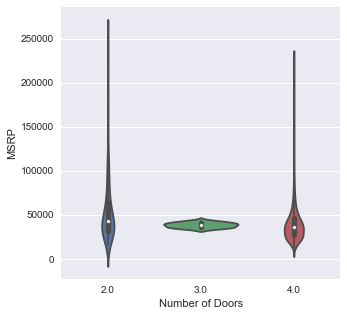

In [37]:
plt.rcParams["figure.figsize"] = (5, 5)
sns.violinplot('Number of Doors', 'MSRP', data=car_df)
sns.despine(trim=True)
plt.show()

<p>
    The violin plots shown here summarize the distributions of MSRP with respect to number of doors.  One surprise was the 3-door category.  After deep diving into the data set,  what was uncovered was the the 3-door car belonged was exclusively the Ford Transit wagon, which has two doors for the driver and passenger seat, and a sliding door on the right hand side for additional passengers.  From uncovering this, the narrow distribution in the 3-door category makes sense since a particular make and model is not expected to have too wide of a price range.  
</p>
<p>
    The 2-door vehicles have a higher median and mean pricing than the 4-door vehicles and also have a much wider spread in pricing.  Therefore, it would be recommended to save on MSRP by going for a 4-door vehicle instead of a 2-door.
</p>

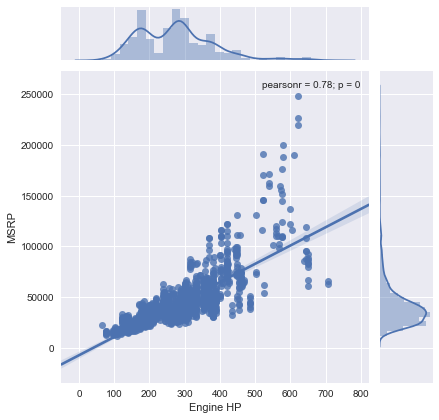

In [38]:
sns.jointplot('Engine HP', 'MSRP', car_df, kind='reg')
plt.show()

<p>
    Here we have a plot showing the relationship of MSRP vs. Engine HP.  Visually, we can see that there is a positive correlation between the two variables which clearly shows that if you plan to purchase a vehicle with a high horse power, be prepared to pay up!  Also what one should take note of is that vehicles with high HP tend to be sports, performance, and luxury brand vehicles which usually are on the higher end of the price range.
</p>

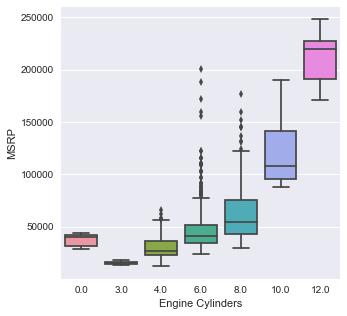

In [39]:
sns.boxplot('Engine Cylinders', 'MSRP', data=car_df)
plt.rcParams["figure.figsize"] = (10, 5)
sns.despine(trim=True)
plt.show()

<p>The following plot shows the distributions of MRSP with respect to the number of engine cylinders.  One thing to point out before discussing this plot is that the 0.0 engine cylinder category implies that the vechicles in this distribution are electric. An interesting observation seen here as well is the more engine cylinder a vehicle has, the higher the mean, and median pricing it is with the exception of the electric vehicles.  Vehicles with more engine cyliders tend to be your sports and performance vehicles, which is already expensive to begin with.  For example, the 10 cylinder vehicles in the data set are exclusively Audi R8 and Dodge Vipers, and the 12 cylinder vehicles are exclusively Mercedes-Benz Maybach, S-Class, and SL-Class.  These cars will be a nice accessory if the consumer has a budget well over $100k to spend.
</p>